In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!wget https://raw.githubusercontent.com/davidlealo/tallermodelossupervisados/main/data/Lluvia_full.csv

zsh:1: command not found: wget


In [8]:
# df = pd.read_csv('/Users/davidlealolivares/Downloads/Lluvia_full.csv')

In [9]:
# df = pd.read_csv('Lluvia.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MinTemp      56420 non-null  float64
 1   MaxTemp      56420 non-null  float64
 2   Lluvia       56420 non-null  float64
 3   Evaporacion  56420 non-null  float64
 4   Sol          56420 non-null  float64
 5   VelRafaga    56420 non-null  float64
 6   Vel9am       56420 non-null  float64
 7   Vel3pm       56420 non-null  float64
 8   Hum9am       56420 non-null  float64
 9   Hum3pm       56420 non-null  float64
 10  Pres9am      56420 non-null  float64
 11  Pre3pm       56420 non-null  float64
 12  Nub9am       56420 non-null  float64
 13  Nub3pm       56420 non-null  float64
 14  Temp9am      56420 non-null  float64
 15  Temp3pm      56420 non-null  float64
 16  LluviaHoy    56420 non-null  object 
 17  LluviaMan    56420 non-null  object 
 18  Koppen       56420 non-null  object 
 19  Esta

In [10]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [12]:
X = df.drop(columns=['LluviaMan'])
y = df['LluviaMan']
# Identificar variables numércicas y categóricas en base de entrenamiento
categoricas = X.columns[X.dtypes=='object']
numericas = X.columns[X.dtypes!='object']
print("Variables categóricas: ",categoricas)
print("Variables numéricas: ",numericas)

# Instanciamos OneHotEncoder y StandardScaler
ohe = OneHotEncoder()
scaler = StandardScaler()

#Creamos transformación de Train
transformer = make_column_transformer(
    (ohe, categoricas),
    (scaler, numericas),
    remainder = 'passthrough',
    verbose_feature_names_out = False
)

Variables categóricas:  Index(['LluviaHoy', 'Koppen', 'Estacion'], dtype='object')
Variables numéricas:  Index(['MinTemp', 'MaxTemp', 'Lluvia', 'Evaporacion', 'Sol', 'VelRafaga',
       'Vel9am', 'Vel3pm', 'Hum9am', 'Hum3pm', 'Pres9am', 'Pre3pm', 'Nub9am',
       'Nub3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')


In [13]:
y.replace({'Yes':1,'No':0}, inplace=True)
y

0        0
1        0
2        0
3        1
4        0
        ..
56415    0
56416    1
56417    1
56418    1
56419    1
Name: LluviaMan, Length: 56420, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
import pandas as pd

# Assuming X and y are already defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# Create the column transformer
transformer = make_column_transformer(
    (OneHotEncoder(), categorical_features),
    (StandardScaler(), numerical_features),
    remainder='passthrough',
    verbose_feature_names_out=False
)

# Fit the transformer to the training data and transform it
X_train_transformed = pd.DataFrame(
    data=transformer.fit_transform(X_train),
    columns=transformer.get_feature_names_out()
)

# Transform the testing data using the fitted transformer
X_test_transformed = pd.DataFrame(
    data=transformer.transform(X_test),
    columns=transformer.get_feature_names_out()
)

# Display the transformed training data
display(X_train_transformed.head())

,LluviaHoy_No,LluviaHoy_Yes,Koppen_Desert,Koppen_Grassland,Koppen_Subtropical,Koppen_Temperate,Estacion_Invierno,Estacion_Otoño,Estacion_Primavera,Estacion_Verano,...,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.158051,0.256735,0.766425,0.712623,-0.742057,-0.826850,0.984435,-1.256478,0.302731,0.348439
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,-0.561103,-1.263708,0.766425,-0.276196,0.287775,0.295730,0.626914,0.253919,-0.200879,0.655607
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.034667,1.777178,-0.260087,-1.413339,-0.727553,-0.447797,-0.088129,-1.256478,0.607949,0.918893
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,-0.561103,-0.795879,0.712398,-0.226755,1.288597,1.199625,-0.803171,-0.501279,-1.360708,-0.894857
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-0.561103,-0.094136,1.414749,1.256474,-0.756562,-0.302007,1.341956,1.386717,-0.689228,-0.982619


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression(solver = "saga", max_iter = 200)
logistic.fit(X_train_transformed, y_train)

Y_pred_test = logistic.predict(X_test_transformed)    

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8853
           1       0.73      0.54      0.62      2431

    accuracy                           0.86     11284
   macro avg       0.81      0.74      0.76     11284
weighted avg       0.85      0.86      0.85     11284



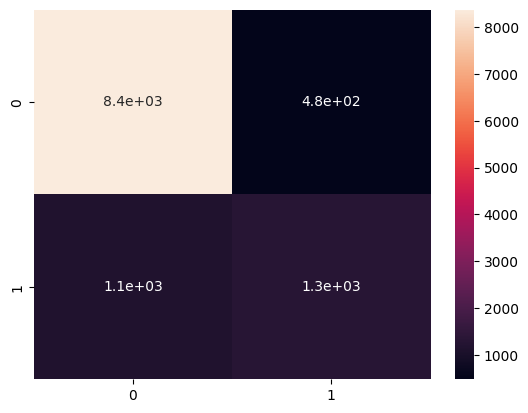

In [16]:
conf_mat = metrics.confusion_matrix(y_test, Y_pred_test)

sns.heatmap(metrics.confusion_matrix(y_test, Y_pred_test), annot=True)

print(metrics.classification_report(y_test, Y_pred_test))

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

In [26]:
auc = roc_auc_score(y_test, Y_pred_test)

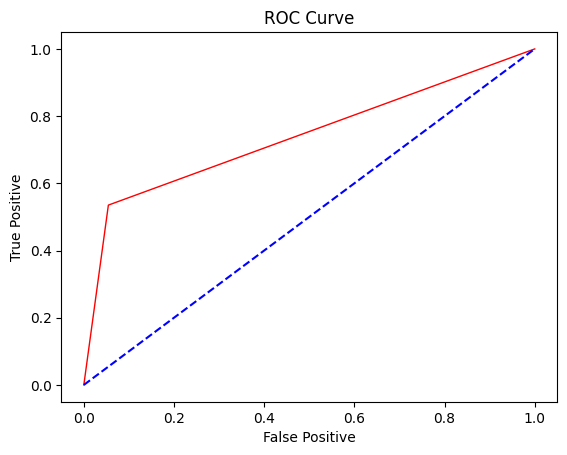

Área bajo la curva (AUC): 0.74


In [27]:
#importar cuva roc area bajo la curva
import matplotlib.pyplot as plt  
from sklearn import metrics

FPR, TPR, cutoffs = metrics.roc_curve(y_test,Y_pred_test, pos_label=1)

plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], ls='--', c='blue', label='Random Chance')
plt.show()
print(f'Área bajo la curva (AUC): {auc:.2f}')

In [34]:
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Definición de modelo y entrenamiento
tree = DecisionTreeClassifier(random_state=2023)
tree.fit(X_train_transformed,y_train)

DecisionTreeClassifier(random_state=2023)

In [40]:
Y_pred_test_tree = tree.predict(X_test_transformed)    

In [41]:
auc = roc_auc_score(y_test, Y_pred_test_tree)

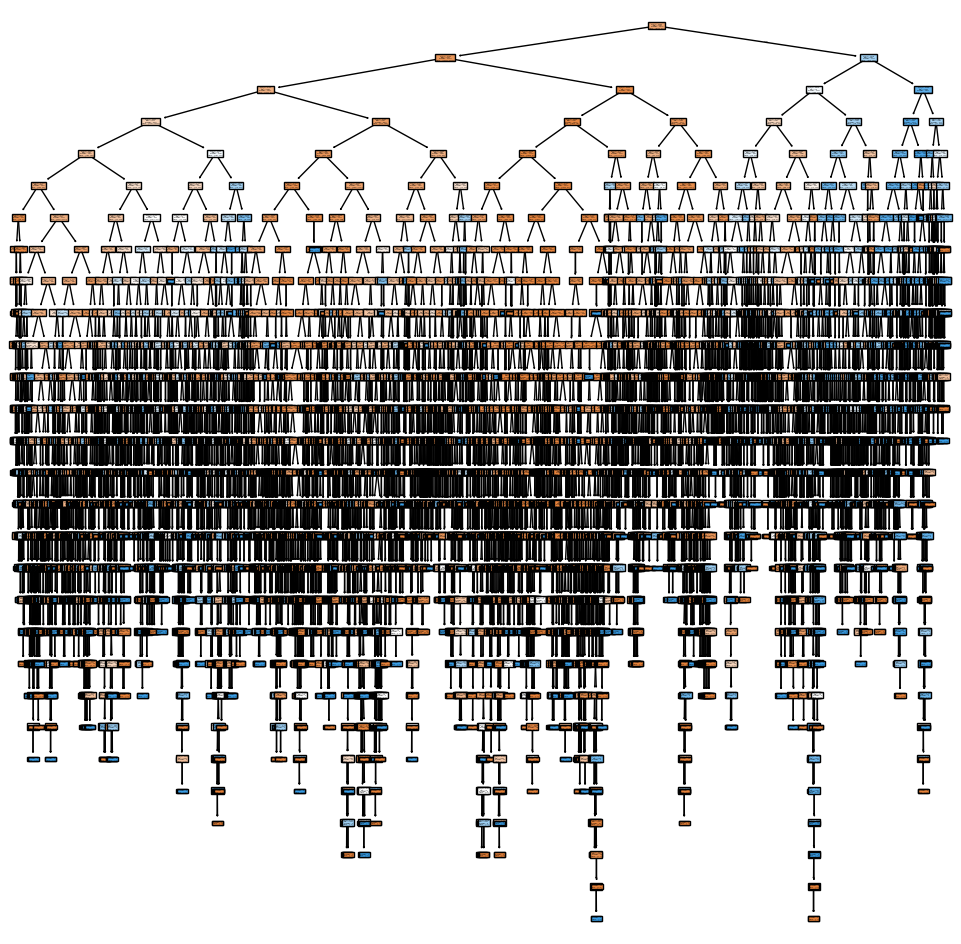

In [35]:
# Visualizar Decision Tree

fig, ax= plt.subplots(figsize=(12,12))
plot_tree(tree,filled=True)
plt.show()


              precision    recall  f1-score   support

           0       0.88      0.87      0.87      8853
           1       0.53      0.55      0.54      2431

    accuracy                           0.80     11284
   macro avg       0.70      0.71      0.71     11284
weighted avg       0.80      0.80      0.80     11284



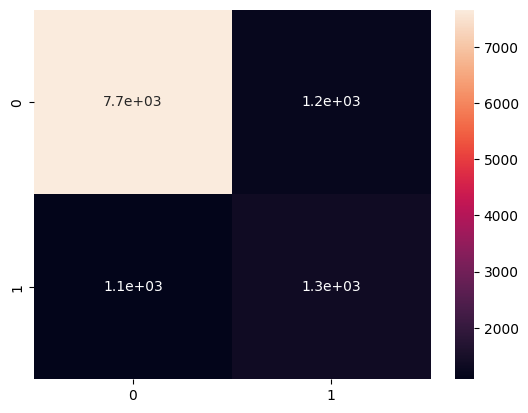

In [42]:
conf_mat = metrics.confusion_matrix(y_test, Y_pred_test_tree)

sns.heatmap(metrics.confusion_matrix(y_test, Y_pred_test_tree), annot=True)

print(metrics.classification_report(y_test, Y_pred_test_tree))

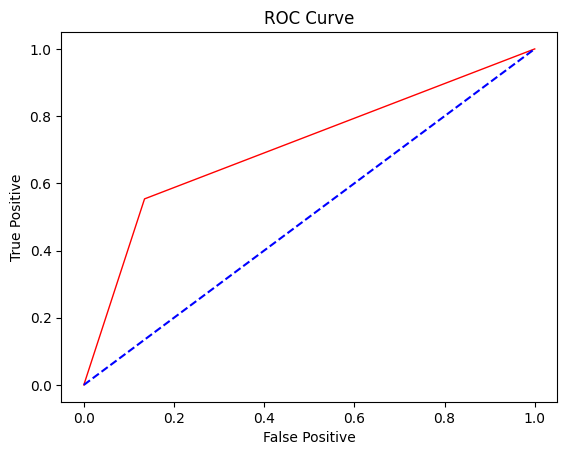

Área bajo la curva (AUC): 0.71


In [43]:
FPR, TPR, cutoffs = metrics.roc_curve(y_test,Y_pred_test_tree, pos_label=1)

plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], ls='--', c='blue', label='Random Chance')
plt.show()
print(f'Área bajo la curva (AUC): {auc:.2f}')

In [36]:
# Ajuste de hiperparámetros

hiperparametros = {'criterion': ['gini','entropy'],
                   'max_depth': np.arange(2,10), 
                   'ccp_alpha': np.logspace(-6,1,15), 
                   'min_samples_split': [2,5,10,20,50]
                   }

In [37]:
gridCV = GridSearchCV(tree, hiperparametros, cv=10, n_jobs = -1, verbose = 1)        # estimator = an instance of DecisionTreeClassifier.
gridCV.fit(X_train_transformed, y_train)
gridCV.best_params_

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


{'ccp_alpha': np.float64(0.0001),
 'criterion': 'gini',
 'max_depth': np.int64(8),
 'min_samples_split': 50}

In [ ]:
gridCV.best_estimator_

In [45]:
# Definición de modelo y entrenamiento
tree2 = gridCV.best_estimator_
tree2.fit(X_train_transformed,y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0001), max_depth=np.int64(8),
                       min_samples_split=50, random_state=2023)

In [46]:
Y_pred_test_tree2 = tree.predict(X_test_transformed)    

In [47]:
auc = roc_auc_score(y_test, Y_pred_test_tree2)

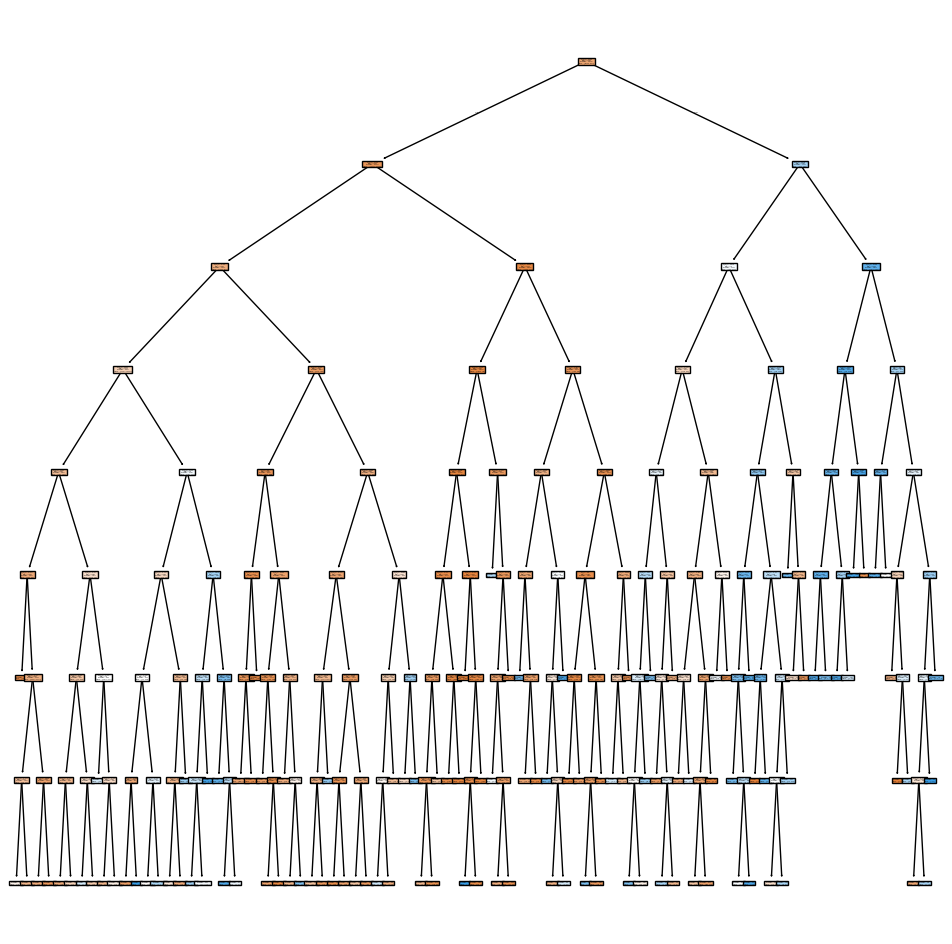

In [48]:
# Visualizar Decision Tree

fig, ax= plt.subplots(figsize=(12,12))
plot_tree(tree2,filled=True)
plt.show()

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      8853
           1       0.53      0.55      0.54      2431

    accuracy                           0.80     11284
   macro avg       0.70      0.71      0.71     11284
weighted avg       0.80      0.80      0.80     11284



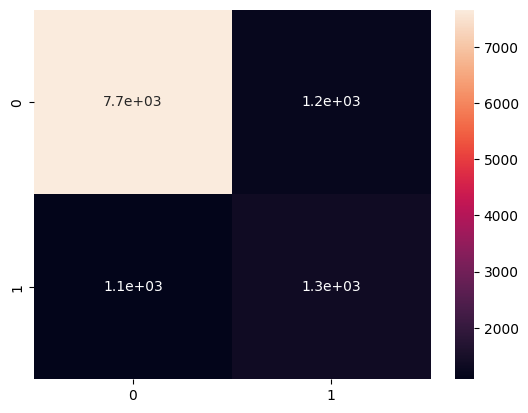

In [49]:
conf_mat = metrics.confusion_matrix(y_test, Y_pred_test_tree2)

sns.heatmap(metrics.confusion_matrix(y_test, Y_pred_test_tree2), annot=True)

print(metrics.classification_report(y_test, Y_pred_test_tree2))

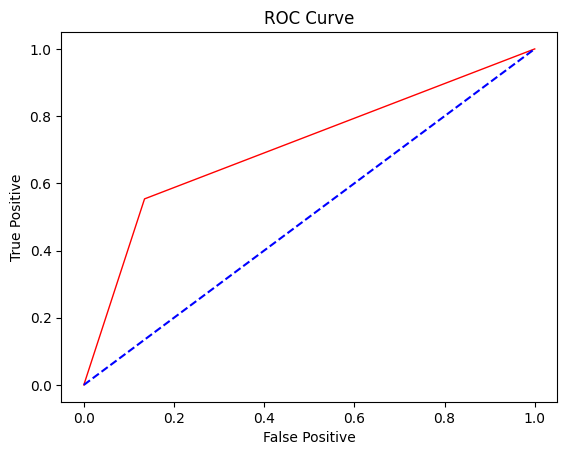

Área bajo la curva (AUC): 0.71


In [50]:
FPR, TPR, cutoffs = metrics.roc_curve(y_test,Y_pred_test_tree2, pos_label=1)

plt.plot(FPR,TPR,c='red',linewidth=1.0)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], ls='--', c='blue', label='Random Chance')
plt.show()
print(f'Área bajo la curva (AUC): {auc:.2f}')